#This notebook contains all the tools that I will use for Reinforcement learning projects 
#Covers only two algorithms 
#1)UCB
#2)Thompson Sampling

#This is an option branch and will be covered in detail in the last Sem of college life after completing Deep learning

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#this function will generate the dataset with all the information
def generate_data(location:str,sample_number=10):
  data=pd.read_csv(location,engine='python')
  head=data.head()
  tail=data.tail()
  sample=data.sample(sample_number)
  description=data.describe()
  columns=data.columns
  info=data.info()
  shape=data.shape
  size=data.size
  return {'data':data,'head':head,'tail':tail,'sample':sample,'description':description,'columns':columns,'info':info,
          'shape':shape,'size':size}

In [3]:
data_set=generate_data('/content/Ads_CTR_Optimisation.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [4]:
data_set['head']

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_set['tail']

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0
9999,0,1,0,0,0,0,0,0,0,0


In [ ]:
data_set['description']

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
data_set['columns']

Index(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5', 'Ad 6', 'Ad 7', 'Ad 8', 'Ad 9',
       'Ad 10'],
      dtype='object')

In [8]:
data=data_set['data']

In [9]:
data_set['shape']

(10000, 10)

In [5]:
def UCB(data):
  import math
  N = data.shape[0] #this is the number of entries in our dataset and we will  be iterating through all the entries
  d = data.shape[1] #this is the number of features in our dataset
  ads_selected = [] #this array contains the add that is selected in a particular round
  numbers_of_selections = [0] * d #number of times an ad is selected
  sums_of_rewards = [0] * d #sum of rewards for the add
  total_reward = 0 #total sum that is awrded in all the rounds and to all the ads
  for n in range(0, N):
    ad = 0 #at the start of each round we are going with this value as the initial value for the selected ad
    max_upper_bound = 0 #since for each round we will select the add with the highest upper bound therefore we are initializing this as zero to find the 
    #add with the highest upper bound


    #calculating Average reward makes sense only if the ad was selected atleast once
    
    for i in range(0, d):
      #this if check makes sure that the add was selected atleast once
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:#if the add is not selcted atlwast once
            upper_bound = 1e400 # we assign infinfite value to the upper_bound
        if upper_bound > max_upper_bound:#then selects this add for the current round
            max_upper_bound = upper_bound#since this will be the max value for the current round
            #therefore the add that is not selcted even once will get selected for this round
            ad = i
    ads_selected.append(ad)# we are appending the add selcted at the end of each round to this array
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1 #increasing the number of times the ad was selcted by 1
    reward = data.values[n, ad] #finding the reward for adth(add) in the nth round
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward #updating the sum of awards for this add
    total_reward = total_reward + reward# appending the reward to the total sum of awards

  return {'ads_selected':ads_selected,'numbers_of_selections':numbers_of_selections,'sums_of_rewards':sums_of_rewards,
         'total_reward':total_reward}

In [10]:
result=UCB(data)

In [ ]:
#this is the add selction for each round
display(result['ads_selected'])

In [12]:
#this is the number of times an add was selected
number_of_selections=result['numbers_of_selections']
for i in range(0,10):
  print(f'The ad {i} was selcted in {number_of_selections[i]}')

The ad 0 was selcted in 705
The ad 1 was selcted in 387
The ad 2 was selcted in 186
The ad 3 was selcted in 345
The ad 4 was selcted in 6323
The ad 5 was selcted in 150
The ad 6 was selcted in 292
The ad 7 was selcted in 1170
The ad 8 was selcted in 256
The ad 9 was selcted in 186


In [13]:
sum_of_rewards=result['sums_of_rewards']
for i in range(0,10):
  print(f'The sum of rewards for ad{i} is {sum_of_rewards[i]}')

The sum of rewards for ad0 is 120
The sum of rewards for ad1 is 47
The sum of rewards for ad2 is 7
The sum of rewards for ad3 is 38
The sum of rewards for ad4 is 1675
The sum of rewards for ad5 is 1
The sum of rewards for ad6 is 27
The sum of rewards for ad7 is 236
The sum of rewards for ad8 is 20
The sum of rewards for ad9 is 7


In [14]:
#this is the total reward awarded to all the ads in all the rounds
result['total_reward']

2178

In [15]:
#Visualizing the result
def visualize(ads_selected,x_label:str,y_label:str):
  plt.hist(ads_selected)
  plt.title('Histogram of ads selections')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()


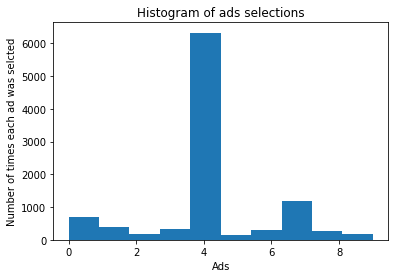

In [ ]:
visualize(result['ads_selected'],'Ads','Number of times each ad was selcted')

In [18]:
#this function will give us the most optimal option by using thompson sampling
def ThompsonSampling(data):
  import random
  N = data.shape[0]  #this is the number of entries in our dataset
  d = data.shape[1] #this is the number of candidates in our dataset
  ads_selected = [] #this contains the ad selected in each round
  numbers_of_rewards_1 = [0] * d #number of times an ad was rewarded 1
  numbers_of_rewards_0 = [0] * d #number of times an as was rewared 0
  total_reward = 0 #this contains the total reward awarded to all the ads in all the rounds
  for n in range(0, N):
    ad = 0 #initially starting with ad 0 as the candidate ad in each round
    max_random = 0 
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)#for each round we need to draw a random draw from the posterior distrubution
        if random_beta > max_random:
            max_random = random_beta#we selecte the candidate with the highest value of this beta random/mean value of distribution
            ad = i
    # we will be selcting the ad with max random beta value
    ads_selected.append(ad)
    reward = data.values[n, ad]#this is the reward either 0 or 1 for the jth ad in the nth round
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1#updating the reward 1 for the selcted ad
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1 #updating the reward 0 for the selected ad
    total_reward = total_reward + reward #updating the total reward as well
  return {'ads_selected':ads_selected,'Reward1':numbers_of_rewards_0,'Reward0':numbers_of_rewards_1,
         'total_reward':total_reward}

In [19]:
result=ThompsonSampling(data)

In [ ]:
#this is the list of selected ad for each round
ads_selected = result['ads_selected']
for i in range (0,len(ads_selected)):
  print(f'The ad selected in the {i}th round is {ads_selcted[i]}')
  

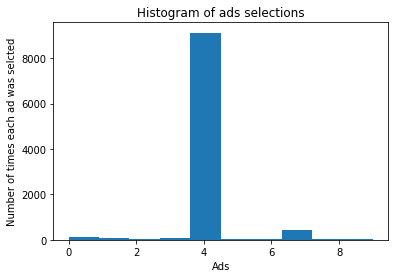

In [28]:
visualize(result['ads_selected'],'Ads','Number of times each ad was selcted')

#UCB VS Thompson Sampling

#1)UCB is deterministic algo whereas Thompson is a probablistic algo

#2)UCB requires update after every round whereas Thompson can accomodate a delayed state update since we can still get a set of pseudo points

#3)therefore Thompson can work with lesser data than compared to the data required by the UCB algo

#4)Thompson has better empirical implication then the UCB algorithm